<a href="https://colab.research.google.com/github/dadiljh/Health-Managment-System/blob/main/CS675_homework1_lab_fall22_2_yujia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Lab
### 10 points total
### Version 1.0

Yujia Wang (631FB8), PARTER2NAME (PARTNER2JHED), etc.

**Instructions:**
This notebook is intended to guide you through a regression task. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Regression

Things to do in this part:
1. Find a dataset according to the instructions below
2. Complete questions 1-2

Your task in this Lab is to explore a regression dataset from the UCI repository and train a linear regression model to solve the task.

#### 1) Choose one datset from the UCI repository for regression task. 

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

*   Describe your dataset. State the features X and output variables Y you are interested in predicting clearly. What is the dimensionality of X and Y? Briefly, give some examples of what each dimension represents?

<font color='blue'>
    Description: this dataset consists of 6 real attributes and a real label. Features are about the characteristics of houses, and the label describes the price of the houses. From X1 to X6, features describes: the trasaction date of that house deal, house age, distance to the nearest MRT station, the number of convenience stores in the living circle on foot, the latitude and the longtitude of the house location. Dimensionality of X: (414, 6), of Y: (414, 1).
</font>
<br/>
<font color='red'>
Examples of data
</font>

* Print a few examples of datapoints to show what the raw data looks like.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as r

In [ ]:
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real estate valuation data set.xlsx'
dataset_name = 'Real estate valuation'

In [ ]:
req = r.get(data_link)

with open('data.csv', 'wb') as f:
  f.write(req.content)

In [ ]:
'''The inputs are as follows
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude. (unit: degree)
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
'''
df = pd.read_excel('data.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# remove NaN
df1 = df.dropna()
# drop irrelevant columns: no
df1 = df1.drop(['No'], axis=1)
df1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
#######################################################
# TODO: Read in your raw data
# It is recommended you store your X and Y matrices into numpy arrays
X = df1.to_numpy()[:, :6]
y = df1.to_numpy()[:, 6]
#######################################################

print (X[:3]) #print the first three rows of your features
print (y[:3]) #print the first three rows of your features

[[2012.9166667   32.          84.87882     10.          24.98298
   121.54024  ]
 [2012.9166667   19.5        306.5947       9.          24.98034
   121.53951  ]
 [2013.5833333   13.3        561.9845       5.          24.98746
   121.54391  ]]
[37.9 42.2 47.3]


In [ ]:
'''special handle for date:
Date value is much larger than all other sections.
Intuitively, as the integer part of date represents the year,
we subtract all the date value with the smallest integer section appear in the set. 
'''
import math

smallest_year = math.floor(np.min(X[:,0]))
X[:,0] -= smallest_year

# normalize X

X_min = np.min(X)
X_max = np.max(X)
X_range = X_max - X_min
X_norm = (X-X_min)/X_range

print(X[:3])
print(X_norm[:3])

[[  0.9166667  32.         84.87882    10.         24.98298   121.54024  ]
 [  0.9166667  19.5       306.5947      9.         24.98034   121.53951  ]
 [  1.5833333  13.3       561.9845      5.         24.98746   121.54391  ]]
[[0.00014129 0.00493217 0.01308239 0.0015413  0.00385063 0.01873302]
 [0.00014129 0.00300554 0.0472555  0.00138717 0.00385022 0.01873291]
 [0.00024404 0.00204993 0.08661879 0.00077065 0.00385132 0.01873359]]


* Create 1 visualization that helps you understand the data. Below is an example from the Iris dataset. You will replace this for your regression dataset. One idea may be to create scatter plots of each feature in X with the output variable Y (the dependent variable).

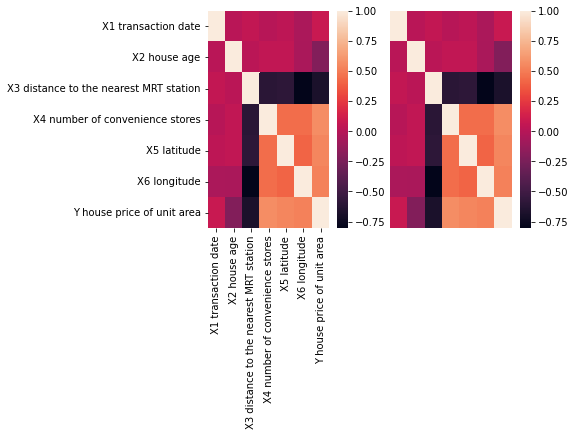

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# iris = datasets.load_iris()
# df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
# sns.heatmap(df.corr(), 
#             xticklabels=df.corr().columns.values,
#             yticklabels=df.corr().columns.values)
# plt.show()

df2 = pd.DataFrame(data=np.c_[X_norm, y], columns=list(df1.columns))

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(df1.corr(), ax=ax1)
sns.heatmap(df2.corr(), ax=ax2, xticklabels=False, yticklabels=False)
plt.show()
# sns.heatmap(df1.corr(), xticklabels='auto', yticklabels='auto')
# plt.show()

* What insights do you gain from this visualization about your dataset? For example, in the above plot we see sepal length and sepal width are negatively correlated. In fact, sepalwidth is negatively correlated with all the features including the class label.

<font color='blue'>
    X4，X5，X6 shows strong positive correlation regardinig Y. In-between correlations of these attributes are around 0.5 to 0.75. However, X3 and X2 shows negative correlation regarding Y, X1 shows tiny linear correlation to Y and normalization do not affect the correlation. </font>
<br/>


#### 2) Train a linear regression model

* Create a train and test split for your dataset by diving the dataset into a 75-25 train-test split. If your chosen dataset already comes with a train-test split use that instead. Below is code for implementing a 75-25 split.

In [ ]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples: {X_test.shape[0]}')

Training examples: 310
Testing examples: 104


* Now that you have your train and test splits, it is time to train a linear regression model for making predictions on future data!  You are encouraged to use popular packages such as sklearn; you are not expected to implement any of these algorithms yourself. We use sklearn's Linear Regression algorithm below. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
r_squared = mean_squared_error(y_test, y_hat)
print(f'Mean Squared Error is {r_squared}')

Mean Squared Error is 70.09935661580064


In [ ]:
# np.vstack([X.T, np.ones((1, X.shape[0]))]).T.shape

In [ ]:
# use numpy to realize linear regression

# append constant for X
X1_train = np.vstack([X_train.T, np.ones((1, X_train.shape[0]))]).T
w, _, _, _ = np.linalg.lstsq(X1_train, y_train, rcond=None)

# calculate test mse
X1_test = np.vstack([X_test.T, np.ones((1, X_test.shape[0]))]).T
y_hat = X1_test@w

print(mean_squared_error(y_hat, y_test))

70.09935661578972


* Explain what the MSE metric is? What value is expected for a good fit? Report your value on the above dataset. 



<font color='blue'>
    MSE metric: the average squared difference between predicted y and the realistic y values.
</font>
<br/>
<font color='blue'>
    The lower the metric value on test dataset, the better the fitness.
</font>

<font color='blue'>
    Our mse: 70.10.
</font>

## Part 2: Regularization
Things to do in this part:
1. Find a dataset according to the instructions below
2. Complete questions 3-4

#### 3) Using the same dataset as above, try ridge (l2 regularizatin on the weights) and lasso (l1 regularization on the weights). Below is sample code for doing the same for ridge regression. You are free to use this. You will implement your own version of l1 regularization (lasso). You are free to use built-in implementation for scikit-learn or any other machine learning library.




In [ ]:
from sklearn.linear_model import Ridge 

reg = Ridge(alpha=1.0).fit(X_train, y_train)
y_hat = reg.predict(X_test)
r_squared = reg.score(X_test, y_test)
print(f'Ridge regression: Goodness of fit given by coefficient of determination is {r_squared}')

Ridge regression: Goodness of fit given by coefficient of determination is 0.5524107580169695


In [ ]:
from sklearn.linear_model import Lasso 

reg = Lasso(alpha=1.0).fit(X_train, y_train)
y_hat = reg.predict(X_test)
r_squared = reg.score(X_test, y_test)
print(f'Lasso regression: Goodness of fit given by coefficient of determination is {r_squared}')

Lasso regression: Goodness of fit given by coefficient of determination is 0.550260992286389


In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
ridge_mse = []
lasso_mse = []

for alpha in alphas:
  reg_ridge = Ridge(alpha=alpha).fit(X_train, y_train)
  y_hat = reg_ridge.predict(X_test)
  r_squared = mean_squared_error(y_hat, y_test)
  ridge_mse.append(r_squared)

  reg_lasso = Lasso(alpha=alpha).fit(X_train, y_train)
  y_hat = reg_lasso.predict(X_test)
  r_squared = mean_squared_error(y_hat, y_test)
  lasso_mse.append(r_squared)

print(f'ridge MSE with alphas: {str(ridge_mse)}')
print(f'lasso MSE with alphas: {str(lasso_mse)}')

ridge MSE with alphas: [70.10534421820242, 70.16048011778508, 70.75280821066752, 73.58651012597623, 75.19450889591552, 74.70089974207471]
lasso MSE with alphas: [70.10249819905064, 70.19045853684513, 71.64113943548428, 75.00127345829168, 75.55566721517287, 87.07741389592509]



* For both l1 and l2 regularization change the regularization hyperparameter (for example alpha hyperparameter in the above cell code for ridge regression) and report changes. What do you observe? Can you explain your observation in terms of model complexity, overfitting and underfitting?

<font color='blue'>
    Observation: 
</font>

#### 4) Model Selection

* In this part we would do model selection using different hyperparameters for regularizaiton we experimented with in the question 3. We would first split the dataset into train-val-test sets. Feel free to experiment with the below code to do so.

In [ ]:
from sklearn.model_selection import train_test_split 

#Divide dataset into a 80-20 random split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Divide the train set further into a 75-25 random split into train-val. If your dataset is small you might want to reduce the test-size parameter for val set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

* Do a grid-search for best hyperparameters by varying the hyperparameter controlling the l1 and l2 regularization of the weights in liner regression. Include the case where alpha=0 corresponding to vanilla linear regression in your experiment. For each hyperparameter, train your model and evaluate the performance on the validation set. Report this in a plot with x-axis being different hyperparameter values for the regularization coefficient and the y-axis being the validation MSE metric obtained. You will report 2 curves one for l1 regularization and one for l2.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'alpha': [0, 1e-8, 1e-4, 1, 10],
#     # 'max_iter': [1000, 10000, 15000, 30000],
#     # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
# }

# grid_ridge = GridSearchCV(Ridge(), param_grid)
# best_ridge = grid_ridge.fit(X_train, y_train).best_estimator_
# best_param = grid_ridge.best_params_

# valid_pred = best_ridge.predict(X_val)
# valid_score = mean_squared_error(valid_pred, y_val)

alphas = [0, 1e-6, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
ridge_mse = []
lasso_mse = []

for alpha in alphas:
  reg_ridge = Ridge(alpha=alpha).fit(X_train, y_train)
  y_hat = reg_ridge.predict(X_test)
  r_squared = mean_squared_error(y_hat, y_test)
  ridge_mse.append(r_squared)

  reg_lasso = Lasso(alpha=alpha).fit(X_train, y_train)
  y_hat = reg_lasso.predict(X_test)
  r_squared = mean_squared_error(y_hat, y_test)
  lasso_mse.append(r_squared)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+04, tolerance: 4.870e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

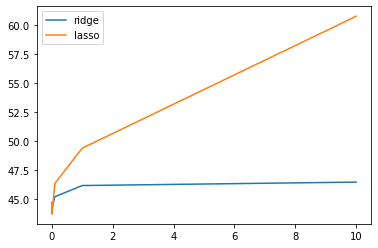

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(alphas, ridge_mse, label='ridge')
plt.plot(alphas, lasso_mse, label='lasso')
plt.legend()
plt.show()

<font color='blue'>
    TODO: replace this cell with your answer
</font>

**bold text** Take your best performing hyperparameters from the previous 


question as your selected model and report the performance on test set. Is it better than what you reported in question 2?


<font color='blue'>
    TODO: replace this cell with your answer
</font>

This concludes homework lab 1!